In [ ]:
# Tutorials/Multi_Topic_Text_Classification_With_Deep_Learning_Models.ipynb at master · kmkarakaya/Deep-Learning-Tutorials
https://github.com/kmkarakaya/Deep-Learning-Tutorials/blob/master/Multi_Topic_Text_Classification_With_Deep_Learning_Models.ipynb

# mount

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
# import module
import pandas as pd


In [ ]:
  
# read the csv file
results_train = pd.read_csv('/content/drive/MyDrive/data/sdp2022/task1_train_dataset.csv')
  
# display dataset
print(results_train)

       index                                              title  \
0          0  Activation of nitrofurazone by azoreductases: ...   
1          1  Organisation and delivery of home care re-able...   
2          2  Relationships between anthocyanins and other c...   
3          3  New Insights into the Mechanisms of Water-Stre...   
4          4  Extensive chordate and annelid macrosynteny re...   
...      ...                                                ...   
51555  51555  BALB/c mice deficient in CD4(+) T cell IL-4R a...   
51556  51556         The Afterlife of Parliamentary Sovereignty   
51557  51557  Metabolomic Proﬁling of In Vivo Plasma Respons...   
51558  51558  Constant flux relation for diffusion-limited c...   
51559  51559  Sequence determinants for the tandem recogniti...   

            first_author                                        description  \
0            M Nakanishi                                                NaN   
1                  Allen             

In [ ]:
df_train = results_train[['title','theme']]
df_train

,title,theme
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ..."
1,Organisation and delivery of home care re-able...,Social Work and Social Policy
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science"
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences
...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,"Allied Health Professions, Dentistry, Nursing ..."
51556,The Afterlife of Parliamentary Sovereignty,Law
51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"Agriculture, Veterinary and Food Science"
51558,Constant flux relation for diffusion-limited c...,Mathematical Sciences


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51560 entries, 0 to 51559
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   51560 non-null  object
 1   theme   51560 non-null  object
dtypes: object(2)
memory usage: 805.8+ KB


# prepare sentences and ys

In [ ]:
sentences = df_train['title'].values
sentences

array(['Activation of nitrofurazone by azoreductases: multiple activities in one enzyme',
       'Organisation and delivery of home care re-ablement : what makes a difference?',
       'Relationships between anthocyanins and other compounds and sensory acceptability of Hibiscus drinks',
       ...,
       'Metabolomic Proﬁling of In Vivo Plasma Responses to DioxinAssociated Dietary Contaminant Exposure in Rats: Implications for Identiﬁcation of Sources of Animal and Human Exposure',
       'Constant flux relation for diffusion-limited cluster-cluster aggregation',
       'Sequence determinants for the tandem recognition of UGU and CUG rich RNA elements by the two N-terminal RRMs of CELF1'],
      dtype=object)

In [ ]:
len(sentences)

51560

In [ ]:
y = df_train['theme'].values
y

array(['Allied Health Professions, Dentistry, Nursing and Pharmacy',
       'Social Work and Social Policy',
       'Agriculture, Veterinary and Food Science', ...,
       'Agriculture, Veterinary and Food Science',
       'Mathematical Sciences',
       'Allied Health Professions, Dentistry, Nursing and Pharmacy'],
      dtype=object)

TypeError: ignored

# tutorial

# import libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import re
import string
import random
from sklearn.model_selection import train_test_split

In [ ]:
#title Record Each Cell's Execution Time
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 203 µs (started: 2022-07-19 13:26:53 +00:00)


In [ ]:
topic_list = df_train.theme.unique()
print("Topics:\n", topic_list)

Topics:
 ['Allied Health Professions, Dentistry, Nursing and Pharmacy'
 'Social Work and Social Policy'
 'Agriculture, Veterinary and Food Science'
 'Earth Systems and Environmental Sciences' 'Biological Sciences'
 'Art and Design: History, Practice and Theory'
 'Psychology, Psychiatry and Neuroscience' 'Law' 'Mathematical Sciences'
 'Public Health, Health Services and Primary Care'
 'Sport and Exercise Sciences, Leisure and Tourism'
 'Business and Management Studies' 'Clinical Medicine' 'Education'
 'Geography, Environmental Studies and Archaeology'
 'Computer Science and Informatics' 'Chemistry'
 'Architecture, Built Environment and Planning' 'Physics'
 'Anthropology and Development Studies' 'History'
 'Civil and Construction Engineering' 'Theology and Religious Studies'
 'English Language and Literature' 'Politics and International Studies'
 'Communication, Cultural and Media Studies, Library and Information Management'
 'General Engineering'
 'Aeronautical, Mechanical, Chemical and

In [ ]:
number_of_topics = len(topic_list)
print("Number of Topics: ",number_of_topics)

Number of Topics:  36
time: 10.1 ms (started: 2022-07-19 13:30:00 +00:00)


In [ ]:
df_train.theme.value_counts()


Clinical Medicine                                                                4903
Business and Management Studies                                                  3906
Allied Health Professions, Dentistry, Nursing and Pharmacy                       3602
Psychology, Psychiatry and Neuroscience                                          3103
Biological Sciences                                                              3026
General Engineering                                                              2622
Computer Science and Informatics                                                 2513
Mathematical Sciences                                                            2470
Physics                                                                          2308
Earth Systems and Environmental Sciences                                         1808
Chemistry                                                                        1597
Public Health, Health Services and Primary Care       

time: 19 ms (started: 2022-07-19 13:30:30 +00:00)


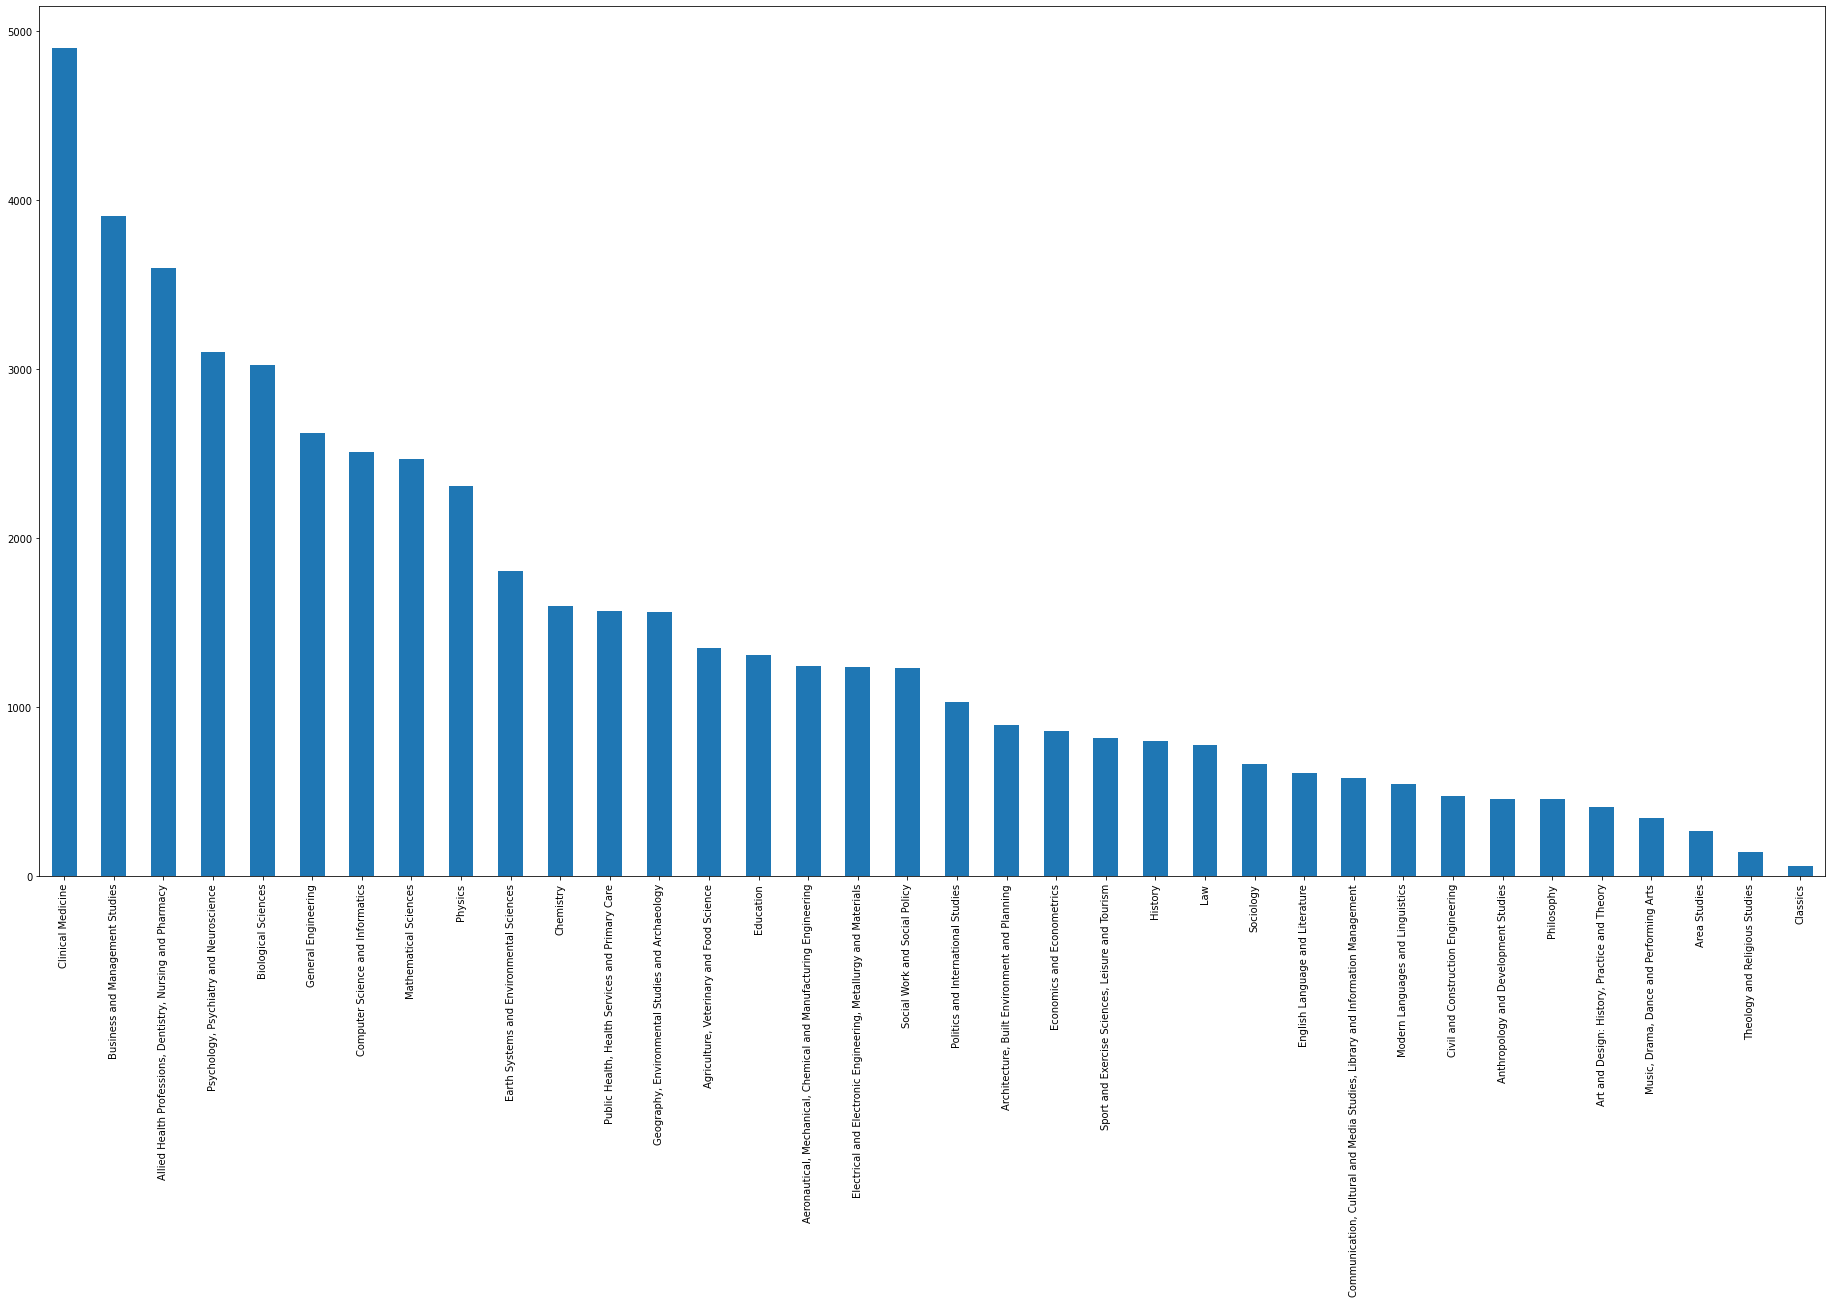

time: 837 ms (started: 2022-07-19 13:31:41 +00:00)


In [ ]:
df_train.theme.value_counts().plot.bar(x="Topics",y="Number of Reviews",figsize=(32,16) )


In [ ]:
df_train.head(5)


,title,theme
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ..."
1,Organisation and delivery of home care re-able...,Social Work and Social Policy
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science"
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences


time: 35.5 ms (started: 2022-07-19 13:32:06 +00:00)


In [ ]:
## Calculate the number of words in each reviews


In [ ]:
df_train['words'] = [len(x.split()) for x in df_train['title'].tolist()]


time: 247 ms (started: 2022-07-19 13:33:35 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train

,title,theme,words
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ...",10
1,Organisation and delivery of home care re-able...,Social Work and Social Policy,12
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science",12
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences,10
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences,10
...,...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,"Allied Health Professions, Dentistry, Nursing ...",24
51556,The Afterlife of Parliamentary Sovereignty,Law,5
51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"Agriculture, Veterinary and Food Science",24
51558,Constant flux relation for diffusion-limited c...,Mathematical Sciences,7


time: 35.4 ms (started: 2022-07-19 13:33:43 +00:00)


# words discprition

In [ ]:
df_train['words'].describe()


count    51560.000000
mean        12.339546
std          4.728717
min          1.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         56.000000
Name: words, dtype: float64

time: 25 ms (started: 2022-07-19 13:34:32 +00:00)


In [ ]:
data= df_train.copy()

time: 4.08 ms (started: 2022-07-19 13:40:54 +00:00)


In [ ]:
data


,title,theme,words
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ...",10
1,Organisation and delivery of home care re-able...,Social Work and Social Policy,12
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science",12
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences,10
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences,10
...,...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,"Allied Health Professions, Dentistry, Nursing ...",24
51556,The Afterlife of Parliamentary Sovereignty,Law,5
51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"Agriculture, Veterinary and Food Science",24
51558,Constant flux relation for diffusion-limited c...,Mathematical Sciences,7


time: 14.5 ms (started: 2022-07-19 13:40:55 +00:00)


In [ ]:
data.columns = ['text','category','words']

time: 2.21 ms (started: 2022-07-19 13:41:02 +00:00)


In [ ]:
data


,text,category,words
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ...",10
1,Organisation and delivery of home care re-able...,Social Work and Social Policy,12
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science",12
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences,10
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences,10
...,...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,"Allied Health Professions, Dentistry, Nursing ...",24
51556,The Afterlife of Parliamentary Sovereignty,Law,5
51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"Agriculture, Veterinary and Food Science",24
51558,Constant flux relation for diffusion-limited c...,Mathematical Sciences,7


time: 18.7 ms (started: 2022-07-19 13:41:04 +00:00)


In [ ]:
data.groupby(['category'])['words'].describe()


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"Aeronautical, Mechanical, Chemical and Manufacturing Engineering",1243.0,12.366854,4.252376,3.0,9.00,12.0,15.0,32.0
"Agriculture, Veterinary and Food Science",1352.0,15.090976,4.870173,3.0,12.00,15.0,18.0,38.0
"Allied Health Professions, Dentistry, Nursing and Pharmacy",3602.0,14.393115,4.753851,2.0,11.00,14.0,17.0,37.0
Anthropology and Development Studies,457.0,11.919037,3.974150,2.0,9.00,12.0,14.0,26.0
"Architecture, Built Environment and Planning",896.0,12.225446,4.080265,3.0,9.00,12.0,15.0,27.0
Area Studies,269.0,11.680297,4.196883,3.0,9.00,11.0,15.0,23.0
"Art and Design: History, Practice and Theory",412.0,10.900485,5.327000,1.0,7.75,10.0,13.0,56.0
Biological Sciences,3026.0,13.209848,4.307124,2.0,10.00,13.0,16.0,49.0
Business and Management Studies,3906.0,11.318228,3.999086,2.0,8.00,11.0,14.0,40.0


time: 115 ms (started: 2022-07-19 13:41:08 +00:00)


In [ ]:
# count the distinctive words

In [ ]:
vocab = set()
corpus= [x.split() for x in data['text'].tolist()]
for sentence in corpus:
  for word in sentence:
    vocab.add(word.lower())
print("Number of distinct words in raw data: ", len(vocab))

Number of distinct words in raw data:  79316
time: 359 ms (started: 2022-07-19 13:42:59 +00:00)


In [ ]:
list(vocab)[:25]


['photolithography',
 'swedds',
 'encephalopathy,',
 'stressors',
 'service-aged',
 'monge',
 'cleveland',
 'imperative',
 'ros-mediated',
 'conformity',
 'pseudomagnetic',
 'linguistics',
 'intraoperative',
 'crust–mantle',
 'hittite',
 'orchid',
 '(1909-1992)',
 'muscle-damaging',
 'ambience',
 'news',
 'crest',
 'alertness-promoting',
 'herpesvirus:',
 '1972-2010',
 "'temporary'"]

time: 30.7 ms (started: 2022-07-19 13:43:28 +00:00)


In [ ]:
word_freq= data.text.str.split(expand=True).stack().value_counts()
word_freq=word_freq.reset_index(name='freq').rename(columns={'index': 'word'})

time: 1.74 s (started: 2022-07-19 13:44:02 +00:00)


In [ ]:
top_50_frequent_words = word_freq[:50]
top_50_frequent_words

,word,freq
0,of,35810
1,and,27537
2,in,23341
3,the,21675
4,a,8917
5,for,8753
6,to,6141
7,The,6076
8,with,4636
9,A,4538


time: 28.6 ms (started: 2022-07-19 13:44:17 +00:00)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51560 entries, 0 to 51559
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      51560 non-null  object
 1   category  51560 non-null  object
 2   words     51560 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
time: 41.3 ms (started: 2022-07-19 13:45:05 +00:00)


In [ ]:
data= data.sample(frac=1)


time: 20.8 ms (started: 2022-07-19 13:45:26 +00:00)


# category discription

In [ ]:
data["category"]


2149      Geography, Environmental Studies and Archaeology
18676    Allied Health Professions, Dentistry, Nursing ...
35045         Art and Design: History, Practice and Theory
36645    Electrical and Electronic Engineering, Metallu...
21341                                  General Engineering
                               ...                        
855                Psychology, Psychiatry and Neuroscience
42843                        Social Work and Social Policy
35009                                  Biological Sciences
49794     Sport and Exercise Sciences, Leisure and Tourism
49847                                  Biological Sciences
Name: category, Length: 51560, dtype: object

time: 20.6 ms (started: 2022-07-19 13:45:34 +00:00)


In [ ]:
# Create integer category ids from text category feature:
data["category"] = data["category"].astype('category')
data.dtypes

text          object
category    category
words          int64
dtype: object

time: 45.6 ms (started: 2022-07-19 13:46:05 +00:00)


In [ ]:
data["category_id"] = data["category"].cat.codes
data.tail()

,text,category,words,category_id
855,Vitamin K2 is a mitochondrial electron carrier...,"Psychology, Psychiatry and Neuroscience",11,30
42843,A longitudinal analysis of loneliness among ol...,Social Work and Social Policy,11,32
35009,Functional viability profiles of breast cancer.,Biological Sciences,6,7
49794,Dark tourism and significant other death,"Sport and Exercise Sciences, Leisure and Tourism",6,34
49847,"Identification, characterization, and structur...",Biological Sciences,13,7


time: 27.9 ms (started: 2022-07-19 13:46:21 +00:00)


In [ ]:
id_to_category = pd.Series(data.category.values,index=data.category_id).to_dict()
id_to_category

{0: 'Aeronautical, Mechanical, Chemical and Manufacturing Engineering',
 1: 'Agriculture, Veterinary and Food Science',
 2: 'Allied Health Professions, Dentistry, Nursing and Pharmacy',
 3: 'Anthropology and Development Studies',
 4: 'Architecture, Built Environment and Planning',
 5: 'Area Studies',
 6: 'Art and Design: History, Practice and Theory',
 7: 'Biological Sciences',
 8: 'Business and Management Studies',
 9: 'Chemistry',
 10: 'Civil and Construction Engineering',
 11: 'Classics',
 12: 'Clinical Medicine',
 13: 'Communication, Cultural and Media Studies, Library and Information Management',
 14: 'Computer Science and Informatics',
 15: 'Earth Systems and Environmental Sciences',
 16: 'Economics and Econometrics',
 17: 'Education',
 18: 'Electrical and Electronic Engineering, Metallurgy and Materials',
 19: 'English Language and Literature',
 20: 'General Engineering',
 21: 'Geography, Environmental Studies and Archaeology',
 22: 'History',
 23: 'Law',
 24: 'Mathematical Scie

time: 145 ms (started: 2022-07-19 13:46:39 +00:00)


In [ ]:
category_to_id= {v:k for k,v in id_to_category.items()}
category_to_id

{'Aeronautical, Mechanical, Chemical and Manufacturing Engineering': 0,
 'Agriculture, Veterinary and Food Science': 1,
 'Allied Health Professions, Dentistry, Nursing and Pharmacy': 2,
 'Anthropology and Development Studies': 3,
 'Architecture, Built Environment and Planning': 4,
 'Area Studies': 5,
 'Art and Design: History, Practice and Theory': 6,
 'Biological Sciences': 7,
 'Business and Management Studies': 8,
 'Chemistry': 9,
 'Civil and Construction Engineering': 10,
 'Classics': 11,
 'Clinical Medicine': 12,
 'Communication, Cultural and Media Studies, Library and Information Management': 13,
 'Computer Science and Informatics': 14,
 'Earth Systems and Environmental Sciences': 15,
 'Economics and Econometrics': 16,
 'Education': 17,
 'Electrical and Electronic Engineering, Metallurgy and Materials': 18,
 'English Language and Literature': 19,
 'General Engineering': 20,
 'Geography, Environmental Studies and Archaeology': 21,
 'History': 22,
 'Law': 23,
 'Mathematical Sciences

time: 18.6 ms (started: 2022-07-19 13:47:43 +00:00)


In [ ]:
# Check the conversions:

print("alisveris id is " , category_to_id["Psychology, Psychiatry and Neuroscience"])
print("0 is for " , id_to_category[0])

alisveris id is  30
0 is for  Aeronautical, Mechanical, Chemical and Manufacturing Engineering
time: 10.5 ms (started: 2022-07-19 13:48:39 +00:00)


In [ ]:
number_of_categories = len(category_to_id)
print("number_of_categories: ",number_of_categories)

number_of_categories:  36
time: 1.97 ms (started: 2022-07-19 14:30:09 +00:00)


# split 


In [ ]:
# save features and targets from the 'data'
features, targets = data['text'], data['category_id']



time: 52.8 ms (started: 2022-07-19 13:53:21 +00:00)


In [ ]:
# split

from sklearn.model_selection import train_test_split

train_features, val_features, train_targets, val_targets  = train_test_split(
        features, targets,
        train_size=0.75,
        test_size=0.25,
        random_state=42,
        shuffle = True,
        stratify=targets
    )

In [ ]:
train_features.values[:5]


array(['John Thelwall in Saint Domingue: Race, slavery, and revolution in the daughter of adoption: A tale of modern times (1801)',
       'How is rape a weapon of war?: feminist international relations, modes of critical explanation and the study of wartime sexual violence',
       'Thermal activation of fatigue crack growth: analysing the mechanisms of fatigue crack propagation in superalloys',
       'Intranasal infection with Chlamydia abortus induces dose-dependent latency and abortion in sheep',
       'BCL6-mediated repression of p53 is critical for leukemia stem cell survival in chronic myeloid leukemia.'],
      dtype=object)

time: 5.18 ms (started: 2022-07-19 13:53:23 +00:00)


In [ ]:
print("Train Data Set size: ",len(train_features))
print("Validation Data Set size: ",len(val_features))
print("Test Data Set size: ",len(test_features))

Train Data Set size:  38670
Validation Data Set size:  12890
Test Data Set size:  12890
time: 4.55 ms (started: 2022-07-19 13:53:50 +00:00)


In [ ]:
# 51560

In [ ]:
test_features

31153    Comparative Effectiveness of Dabigatran, Rivar...
51023    Noninvasive prenatal diagnosis of hemophilia b...
33579    Organisational Learning, Innovation and Intern...
9499     UBE2S elongates ubiquitin chains on APC/C subs...
35219    Available processing resources influence encod...
                               ...                        
25898    Coping with displacement: problems and respons...
28779              Fairness and the Politics of Resentment
19373    10 lessons from 10 years of measuring and mode...
46871    A 'wall of ideas': the taboo on tenderness in ...
35333    Internal loss data collection implementation: ...
Name: text, Length: 12890, dtype: object

time: 22.7 ms (started: 2022-07-19 13:57:10 +00:00)


In [ ]:
val_features

31153    Comparative Effectiveness of Dabigatran, Rivar...
51023    Noninvasive prenatal diagnosis of hemophilia b...
33579    Organisational Learning, Innovation and Intern...
9499     UBE2S elongates ubiquitin chains on APC/C subs...
35219    Available processing resources influence encod...
                               ...                        
25898    Coping with displacement: problems and respons...
28779              Fairness and the Politics of Resentment
19373    10 lessons from 10 years of measuring and mode...
46871    A 'wall of ideas': the taboo on tenderness in ...
35333    Internal loss data collection implementation: ...
Name: text, Length: 12890, dtype: object

time: 26.1 ms (started: 2022-07-19 13:57:28 +00:00)


In [ ]:
# Build the Train TensorFlow Datasets


time: 1.23 ms (started: 2022-07-19 13:58:06 +00:00)


In [ ]:
train_features.values[:5]


array(['John Thelwall in Saint Domingue: Race, slavery, and revolution in the daughter of adoption: A tale of modern times (1801)',
       'How is rape a weapon of war?: feminist international relations, modes of critical explanation and the study of wartime sexual violence',
       'Thermal activation of fatigue crack growth: analysing the mechanisms of fatigue crack propagation in superalloys',
       'Intranasal infection with Chlamydia abortus induces dose-dependent latency and abortion in sheep',
       'BCL6-mediated repression of p53 is critical for leukemia stem cell survival in chronic myeloid leukemia.'],
      dtype=object)

time: 6.08 ms (started: 2022-07-19 13:58:13 +00:00)


In [ ]:
train_targets.values[:5]


array([19, 29, 20,  1, 12], dtype=int8)

time: 25.8 ms (started: 2022-07-19 13:58:18 +00:00)


In [ ]:
# this is the input (text/reviews) dataset
train_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_features.values, tf.string)
) 

time: 174 ms (started: 2022-07-19 13:58:46 +00:00)


In [ ]:
# this is the target (categories/topics) dataset
train_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_targets.values, tf.int64),

) 

time: 17.8 ms (started: 2022-07-19 13:58:54 +00:00)


In [ ]:
vocab_size = 5000  # Only consider the top 100K words
max_len = 60  # Max review size in words

time: 12.8 ms (started: 2022-07-19 14:05:30 +00:00)


In [ ]:
# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    #standardize=custom_standardization,
    max_tokens=vocab_size - 1,
    output_mode="int", #tf-idf / int / binary / count
    output_sequence_length=max_len,
)

time: 50.2 ms (started: 2022-07-19 14:09:12 +00:00)


In [ ]:
vectorize_layer.adapt(train_text_ds_raw)
vocab = vectorize_layer.get_vocabulary()  
# To get words back from token indices

time: 30.5 s (started: 2022-07-19 14:09:35 +00:00)


In [ ]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ", vocab[word])
print("2 sample text preprocessing:")
for X in train_text_ds_raw.take(2):
  print(" Given raw data: " )
  print(X.numpy().decode("utf-8") )
  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" Tokenized and Transformed to a vector of integers: " )
  print (tokenized)
  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed) 

vocab has the  4999  entries
vocab has the following first 10 entries
0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  of
3  represents the word:  the
4  represents the word:  and
5  represents the word:  in
6  represents the word:  a
7  represents the word:  for
8  represents the word:  to
9  represents the word:  with
2 sample text preprocessing:
 Given raw data: 
John Thelwall in Saint Domingue: Race, slavery, and revolution in the daughter of adoption: A tale of modern times (1801)
 Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[2259    1    5    1    1 1569 4540    4 1984    5    3    1    2 1457
     6 2866    2  611 1182    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]], shape=(1, 60), dtype=int64)
 Text after Tokenized and Transformed: 
 john [UNK] in [UNK] [UNK] race

In [ ]:
%cd ../models/


[Errno 2] No such file or directory: '../models/'
/content
time: 4.83 ms (started: 2022-07-19 14:17:33 +00:00)


In [ ]:
%ls

drive/  sample_data/
time: 175 ms (started: 2022-07-19 14:17:45 +00:00)


In [ ]:
%pwd

'/content'

time: 10.2 ms (started: 2022-07-19 14:13:05 +00:00)


In [ ]:
%ls ../

bin/      dev/   lib32/  opt/         run/   tensorflow-1.15.2/  var/
boot/     etc/   lib64/  proc/        sbin/  tmp/
content/  home/  media/  python-apt/  srv/   tools/
datalab/  lib/   mnt/    root/        sys/   usr/
time: 146 ms (started: 2022-07-19 14:13:24 +00:00)


In [ ]:
!pwd


/content
time: 140 ms (started: 2022-07-19 14:14:45 +00:00)


In [ ]:
# Create a model to embed the trained TextVectorization layer
vectorizer_model = tf.keras.models.Sequential()
vectorizer_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
vectorizer_model.add(vectorize_layer)
vectorizer_model.summary()

# Save it
filepath = "vectorize_layer_model"
vectorizer_model.save(filepath, save_format="tf")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 60)               0         
 torization)                                                     
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: vectorize_layer_model/assets


INFO:tensorflow:Assets written to: vectorize_layer_model/assets


time: 1.06 s (started: 2022-07-19 14:19:43 +00:00)


In [ ]:
%ls 


drive/  sample_data/  vectorize_layer_model/
time: 150 ms (started: 2022-07-19 14:20:24 +00:00)


In [ ]:
# Load the saved model
loaded_vectorizer_model = tf.keras.models.load_model(filepath)
# Extract the trained TextVectorization layer out of the loaded model
loaded_vectorizer_layer = loaded_vectorizer_model.layers[0]

time: 666 ms (started: 2022-07-19 14:20:36 +00:00)


In [ ]:
loaded_vocab = loaded_vectorizer_layer.get_vocabulary()
print("original vocab has the ", len(vocab)," entries")
print("loaded_vectorizer_layer vocab has the ", len(loaded_vocab)," entries")
print("original vocab: ", vocab[:10])
print("loaded vocab  : ", loaded_vocab[:10])

original vocab has the  4999  entries
loaded_vectorizer_layer vocab has the  4999  entries
original vocab:  ['', '[UNK]', 'of', 'the', 'and', 'in', 'a', 'for', 'to', 'with']
loaded vocab  :  ['', '[UNK]', 'of', 'the', 'and', 'in', 'a', 'for', 'to', 'with']
time: 33.3 ms (started: 2022-07-19 14:20:59 +00:00)


In [ ]:
for X in train_text_ds_raw.take(1):
  print(" Given raw data: " )
  print(X.numpy().decode("utf-8") )

  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" original vectorizer layer: Tokenized and Transformed to a vector of integers: " )
  print (tokenized)

  tokenized = loaded_vectorizer_layer(tf.expand_dims(X, -1))
  print(" loaded_vectorizer_layer: Tokenized and Transformed to a vector of integers: " )
  #print (tokenized.to_tensor(shape=[1, max_review_size]))
  print (tokenized)
  
  tokenized = loaded_vectorizer_model.predict(tf.expand_dims(X, -1))
  print(" loaded_vectorizer_model: Tokenized and Transformed to a vector of integers: " )
  #print (tokenized.to_tensor(shape=[1, max_review_size]))
  print (tokenized)

  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed)

 Given raw data: 
John Thelwall in Saint Domingue: Race, slavery, and revolution in the daughter of adoption: A tale of modern times (1801)
 original vectorizer layer: Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[2259    1    5    1    1 1569 4540    4 1984    5    3    1    2 1457
     6 2866    2  611 1182    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]], shape=(1, 60), dtype=int64)
 loaded_vectorizer_layer: Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[2259    1    5    1    1 1569 4540    4 1984    5    3    1    2 1457
     6 2866    2  611 1182    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]], shape=(1, 60), dtype=int64

In [ ]:
def prepare_lm_inputs_labels(text):
    text = tf.expand_dims(text, -1) 
    return tf.squeeze(vectorize_layer(text))
    #return tf.squeeze(loaded_vectorizer_layer(text).to_tensor(shape=[1, max_review_size])) 

time: 3.92 ms (started: 2022-07-19 14:21:50 +00:00)


In [ ]:
train_text_ds = train_text_ds_raw.map(prepare_lm_inputs_labels, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 81.5 ms (started: 2022-07-19 14:23:05 +00:00)


In [ ]:
train_text_ds.element_spec


TensorSpec(shape=<unknown>, dtype=tf.int64, name=None)

time: 7.02 ms (started: 2022-07-19 14:23:15 +00:00)


In [ ]:
for each in train_text_ds.take(1):
  print(each)

tf.Tensor(
[2259    1    5    1    1 1569 4540    4 1984    5    3    1    2 1457
    6 2866    2  611 1182    1    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0], shape=(60,), dtype=int64)
time: 49.1 ms (started: 2022-07-19 14:23:28 +00:00)


In [ ]:
train_ds = tf.data.Dataset.zip(
    (       train_text_ds,
            train_cat_ds_raw
        )
) 

time: 5.06 ms (started: 2022-07-19 14:23:40 +00:00)


In [ ]:
train_ds.element_spec


(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

time: 9.71 ms (started: 2022-07-19 14:23:55 +00:00)


In [ ]:
for X,y in train_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ", y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("input (review as text): " , input)
  print("output (category as text): " , output)

X.shape:  (60,) y.shape:  ()
X:  tf.Tensor(
[2259    1    5    1    1 1569 4540    4 1984    5    3    1    2 1457
    6 2866    2  611 1182    1    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0], shape=(60,), dtype=int64)
y:  tf.Tensor(19, shape=(), dtype=int64)
input (review as text):  john [UNK] in [UNK] [UNK] race slavery and revolution in the [UNK] of adoption a tale of modern times [UNK]                                        
output (category as text):  English Language and Literature
time: 63.5 ms (started: 2022-07-19 14:24:06 +00:00)


In [ ]:
# train dataset size 
train_size = train_ds.cardinality().numpy()
print("Train size: ", train_size)

Train size:  38670
time: 5.57 ms (started: 2022-07-19 14:24:34 +00:00)


In [ ]:
# valication data

In [ ]:
val_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(val_features.values, tf.string)
) 

time: 26.3 ms (started: 2022-07-19 14:24:49 +00:00)


In [ ]:
val_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(val_targets.values, tf.int64),

) 

time: 15.3 ms (started: 2022-07-19 14:25:04 +00:00)


In [ ]:
val_text_ds = val_text_ds_raw.map(prepare_lm_inputs_labels, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)


time: 86.8 ms (started: 2022-07-19 14:25:23 +00:00)


In [ ]:
val_ds = tf.data.Dataset.zip(
    (       val_text_ds,
            val_cat_ds_raw
       )
)

time: 7.48 ms (started: 2022-07-19 14:25:53 +00:00)


In [ ]:
for X,y in val_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ",y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("input (review as text): " , input)
  print("output (category as text ): " , output)

X.shape:  (60,) y.shape:  ()
X:  tf.Tensor(
[ 223  375    2    1    1    1    4    1    5    3   62    2   35    9
    1 2626 3493    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0], shape=(60,), dtype=int64)
y:  tf.Tensor(2, shape=(), dtype=int64)
input (review as text):  comparative effectiveness of [UNK] [UNK] [UNK] and [UNK] in the management of patients with [UNK] atrial fibrillation                                           
output (category as text ):  Allied Health Professions, Dentistry, Nursing and Pharmacy
time: 63.3 ms (started: 2022-07-19 14:26:02 +00:00)


In [ ]:
# test data 

In [ ]:
test_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_features.values, tf.string)
) 

time: 14.3 ms (started: 2022-07-19 14:26:26 +00:00)


In [ ]:
test_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_targets.values, tf.int64),

) 

time: 12.5 ms (started: 2022-07-19 14:26:34 +00:00)


In [ ]:
test_text_ds = test_text_ds_raw.map(prepare_lm_inputs_labels, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 83.1 ms (started: 2022-07-19 14:26:47 +00:00)


In [ ]:
test_ds = tf.data.Dataset.zip(
    (       test_text_ds,
            test_cat_ds_raw
       )
) 

time: 9.32 ms (started: 2022-07-19 14:26:53 +00:00)


In [ ]:
for X,y in test_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ",y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("input (review as text): " , input)
  print("output (category as text ): " , output)

X.shape:  (60,) y.shape:  ()
X:  tf.Tensor(
[ 223  375    2    1    1    1    4    1    5    3   62    2   35    9
    1 2626 3493    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0], shape=(60,), dtype=int64)
y:  tf.Tensor(2, shape=(), dtype=int64)
input (review as text):  comparative effectiveness of [UNK] [UNK] [UNK] and [UNK] in the management of patients with [UNK] atrial fibrillation                                           
output (category as text ):  Allied Health Professions, Dentistry, Nursing and Pharmacy
time: 55.9 ms (started: 2022-07-19 14:27:04 +00:00)


In [ ]:
# Finalize the TensorFlow Data Pipeline


SyntaxError: ignored

In [ ]:
batch_size=64
AUTOTUNE=tf.data.experimental.AUTOTUNE

train_ds=train_ds.shuffle(buffer_size=train_size)
train_ds=train_ds.batch(batch_size=batch_size,drop_remainder=True)
train_ds=train_ds.cache()
train_ds = train_ds.prefetch(AUTOTUNE)

val_ds=val_ds.shuffle(buffer_size=train_size)
val_ds=val_ds.batch(batch_size=batch_size,drop_remainder=True)
val_ds=val_ds.cache()
val_ds = val_ds.prefetch(AUTOTUNE)

test_ds=test_ds.shuffle(buffer_size=train_size)
test_ds=test_ds.batch(batch_size=batch_size,drop_remainder=True)
test_ds=test_ds.cache()
test_ds = test_ds.prefetch(AUTOTUNE)

time: 23.4 ms (started: 2022-07-19 14:27:18 +00:00)


In [ ]:
train_ds.element_spec


(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

time: 15.8 ms (started: 2022-07-19 14:27:44 +00:00)


In [ ]:
for X, y in train_ds.take(1):
  print(X.shape, y.shape)
  print("All categories values in this batch: ", y)
  print("\nFirst sample in the batch:")
  print("\tX is: " ,X[0])
  print("\ty is: ", y[0].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[0])])
  output = id_to_category[y[0].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

  print("\nSecond sample in the batch:")
  print("\tX is: " ,X[1])
  print("\ty is: ", y[1].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[1])])
  output = id_to_category[y[1].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

(64, 60) (64,)
All categories values in this batch:  tf.Tensor(
[ 2 18 12 20 31 28  2 29  7 26 18 29 30  8 15  7  2 12 24  2 31 25  8 28
 23 17 30 17  8  4 27 23 20 21  1 31  9 32 27 14  8 28 28  2 12  8  8  2
  9 17 17 27 31 32  2 12 22  2  8 14 22  6 12 20], shape=(64,), dtype=int64)

First sample in the batch:
	X is:  tf.Tensor(
[   1  516 2662    5 4316    4 3463 4658    1    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0], shape=(60,), dtype=int64)
	y is:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=2>>
	input (in text):  [UNK] matrix remodeling in metastasis and mammary gland [UNK]                                                   
	output (in category):  Allied Health Professions, Dentistry, Nursing and Pharmacy

Second sample in the bat

In [ ]:
# PART E: TEXT CLASSIFICATION WITH AN EMBEDDING LAYER IN A FEED FORWARD NETWORK


In [ ]:
# Embedding size for each token
embed_dim = 16 
# Hidden layer size in feed forward network
feed_forward_dim = 64  
def create_model_FFN():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = layers.Embedding(input_dim=vocab_size, 
                                       output_dim=embed_dim, 
                                       input_length=max_len)
    x = embedding_layer(inputs_tokens)
    x = layers.Flatten()(x)
    dense_layer = layers.Dense(feed_forward_dim, activation='relu')
    x = dense_layer(x)
    x = layers.Dropout(.5)(x)
    outputs = layers.Dense(number_of_categories)(x)

    model = keras.Model(inputs=inputs_tokens, outputs=outputs, name='model_FFN')
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)  
    return model
  
model_FFN=create_model_FFN()

time: 69.5 ms (started: 2022-07-19 14:30:17 +00:00)


In [ ]:
model_FFN.summary()


Model: "model_FFN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 60, 16)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                61504     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 36)                2340      
                                                                 
Total params: 143,844
Trainable params: 143,844
Non-train

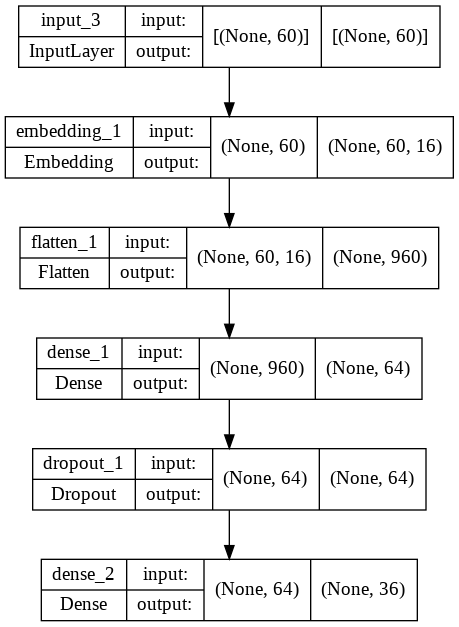

time: 339 ms (started: 2022-07-19 14:30:59 +00:00)


In [ ]:
tf.keras.utils.plot_model(model_FFN,show_shapes=True)


In [ ]:
history=model_FFN.fit(train_ds, validation_data=val_ds ,verbose=2, epochs=20)


Epoch 1/20
604/604 - 4s - loss: 1.7202 - sparse_categorical_accuracy: 0.4736 - val_loss: 2.1182 - val_sparse_categorical_accuracy: 0.3875 - 4s/epoch - 6ms/step
Epoch 2/20
604/604 - 2s - loss: 1.6366 - sparse_categorical_accuracy: 0.4989 - val_loss: 2.1511 - val_sparse_categorical_accuracy: 0.3843 - 2s/epoch - 4ms/step
Epoch 3/20
604/604 - 2s - loss: 1.5643 - sparse_categorical_accuracy: 0.5144 - val_loss: 2.1918 - val_sparse_categorical_accuracy: 0.3837 - 2s/epoch - 4ms/step
Epoch 4/20
604/604 - 2s - loss: 1.4953 - sparse_categorical_accuracy: 0.5363 - val_loss: 2.2496 - val_sparse_categorical_accuracy: 0.3811 - 2s/epoch - 4ms/step
Epoch 5/20
604/604 - 2s - loss: 1.4352 - sparse_categorical_accuracy: 0.5511 - val_loss: 2.3264 - val_sparse_categorical_accuracy: 0.3745 - 2s/epoch - 4ms/step
Epoch 6/20
604/604 - 2s - loss: 1.3865 - sparse_categorical_accuracy: 0.5667 - val_loss: 2.3962 - val_sparse_categorical_accuracy: 0.3727 - 2s/epoch - 4ms/step
Epoch 7/20
604/604 - 2s - loss: 1.3283 -

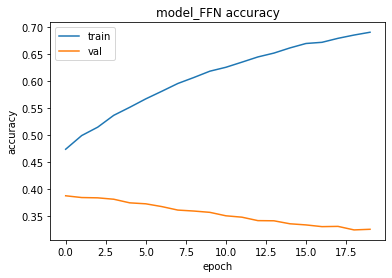

time: 310 ms (started: 2022-07-19 14:33:32 +00:00)


In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_FFN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

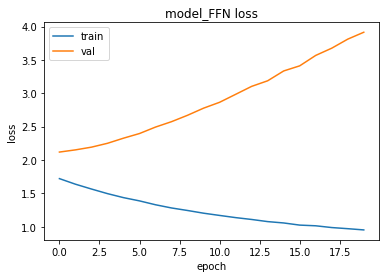

time: 425 ms (started: 2022-07-19 14:33:47 +00:00)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_FFN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# save the trained model
tf.keras.models.save_model(model_FFN, 'MultiClassTextClassification_FFN')


INFO:tensorflow:Assets written to: MultiClassTextClassification_FFN/assets


INFO:tensorflow:Assets written to: MultiClassTextClassification_FFN/assets


time: 1.16 s (started: 2022-07-19 14:34:13 +00:00)


In [ ]:
%ls


drive/     MultiClassTextClassification_FFN/  vectorize_layer_model/
model.png  sample_data/
time: 149 ms (started: 2022-07-19 14:34:20 +00:00)


In [ ]:
# test 
loss, accuracy = model_FFN.evaluate(test_ds)
print("Test accuracy: ", accuracy)


201/201 [==============================] - 2s 3ms/step - loss: 3.9154 - sparse_categorical_accuracy: 0.3252
Test accuracy:  0.32524874806404114
time: 2.66 s (started: 2022-07-19 14:34:36 +00:00)


In [ ]:
preds = model_FFN.predict(test_ds)
preds = preds.argmax(axis=1)

time: 746 ms (started: 2022-07-19 14:34:54 +00:00)


In [ ]:
actuals = test_ds.unbatch().map(lambda x,y: y)  
actuals=list(actuals.as_numpy_iterator())

time: 6.7 s (started: 2022-07-19 14:35:15 +00:00)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(actuals, preds, digits=4))

              precision    recall  f1-score   support

           0     0.2036    0.1093    0.1423       311
           1     0.2561    0.1864    0.2158       338
           2     0.2444    0.2316    0.2379       898
           3     0.0784    0.0351    0.0485       114
           4     0.2746    0.2377    0.2548       223
           5     0.0000    0.0000    0.0000        67
           6     0.0455    0.0194    0.0272       103
           7     0.3060    0.3258    0.3156       755
           8     0.4328    0.5421    0.4813       974
           9     0.3905    0.3719    0.3810       398
          10     0.0833    0.0424    0.0562       118
          11     0.0000    0.0000    0.0000        15
          12     0.4818    0.4980    0.4897      1223
          13     0.1416    0.1096    0.1236       146
          14     0.3208    0.3933    0.3534       628
          15     0.3290    0.3933    0.3583       450
          16     0.1057    0.0607    0.0772       214
          17     0.3631    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix, 
# which compares the y_test and y_pred
cm = confusion_matrix(actuals, preds)
cm_df = pd.DataFrame(cm, index = id_to_category.values() ,columns = id_to_category.values())

time: 28.9 ms (started: 2022-07-19 14:37:05 +00:00)


In [ ]:
cm_df


,"Geography, Environmental Studies and Archaeology","Allied Health Professions, Dentistry, Nursing and Pharmacy","Art and Design: History, Practice and Theory","Electrical and Electronic Engineering, Metallurgy and Materials",General Engineering,Computer Science and Informatics,Economics and Econometrics,Clinical Medicine,Mathematical Sciences,"Agriculture, Veterinary and Food Science",...,Politics and International Studies,English Language and Literature,Civil and Construction Engineering,Earth Systems and Environmental Sciences,Sociology,"Music, Drama, Dance and Performing Arts","Architecture, Built Environment and Planning",Law,Area Studies,Theology and Religious Studies
"Geography, Environmental Studies and Archaeology",34,9,13,0,6,0,3,12,11,12,...,0,0,17,0,3,1,2,0,0,0
"Allied Health Professions, Dentistry, Nursing and Pharmacy",4,63,40,4,2,0,0,61,5,10,...,0,0,7,2,15,5,2,0,2,0
"Art and Design: History, Practice and Theory",8,30,208,2,7,0,1,81,24,23,...,1,1,9,4,97,58,43,3,20,0
"Electrical and Electronic Engineering, Metallurgy and Materials",0,1,5,4,3,0,0,2,14,0,...,1,2,2,16,5,1,8,1,1,0
General Engineering,3,0,2,0,53,0,2,1,54,1,...,0,0,0,3,3,0,10,0,6,0
Computer Science and Informatics,0,0,1,0,1,0,0,0,12,0,...,2,2,0,9,1,0,5,2,0,0
Economics and Econometrics,1,0,1,0,5,0,2,0,10,2,...,2,2,1,1,4,0,4,1,2,0
Clinical Medicine,4,34,71,4,1,0,1,246,9,31,...,0,2,9,2,61,7,2,0,2,0
Mathematical Sciences,0,2,13,6,19,0,3,4,528,2,...,1,10,4,38,40,6,40,2,12,0
"Agriculture, Veterinary and Food Science",9,3,25,1,0,0,1,35,3,148,...,2,2,43,0,2,0,0,0,0,0


time: 66.7 ms (started: 2022-07-19 14:37:14 +00:00)


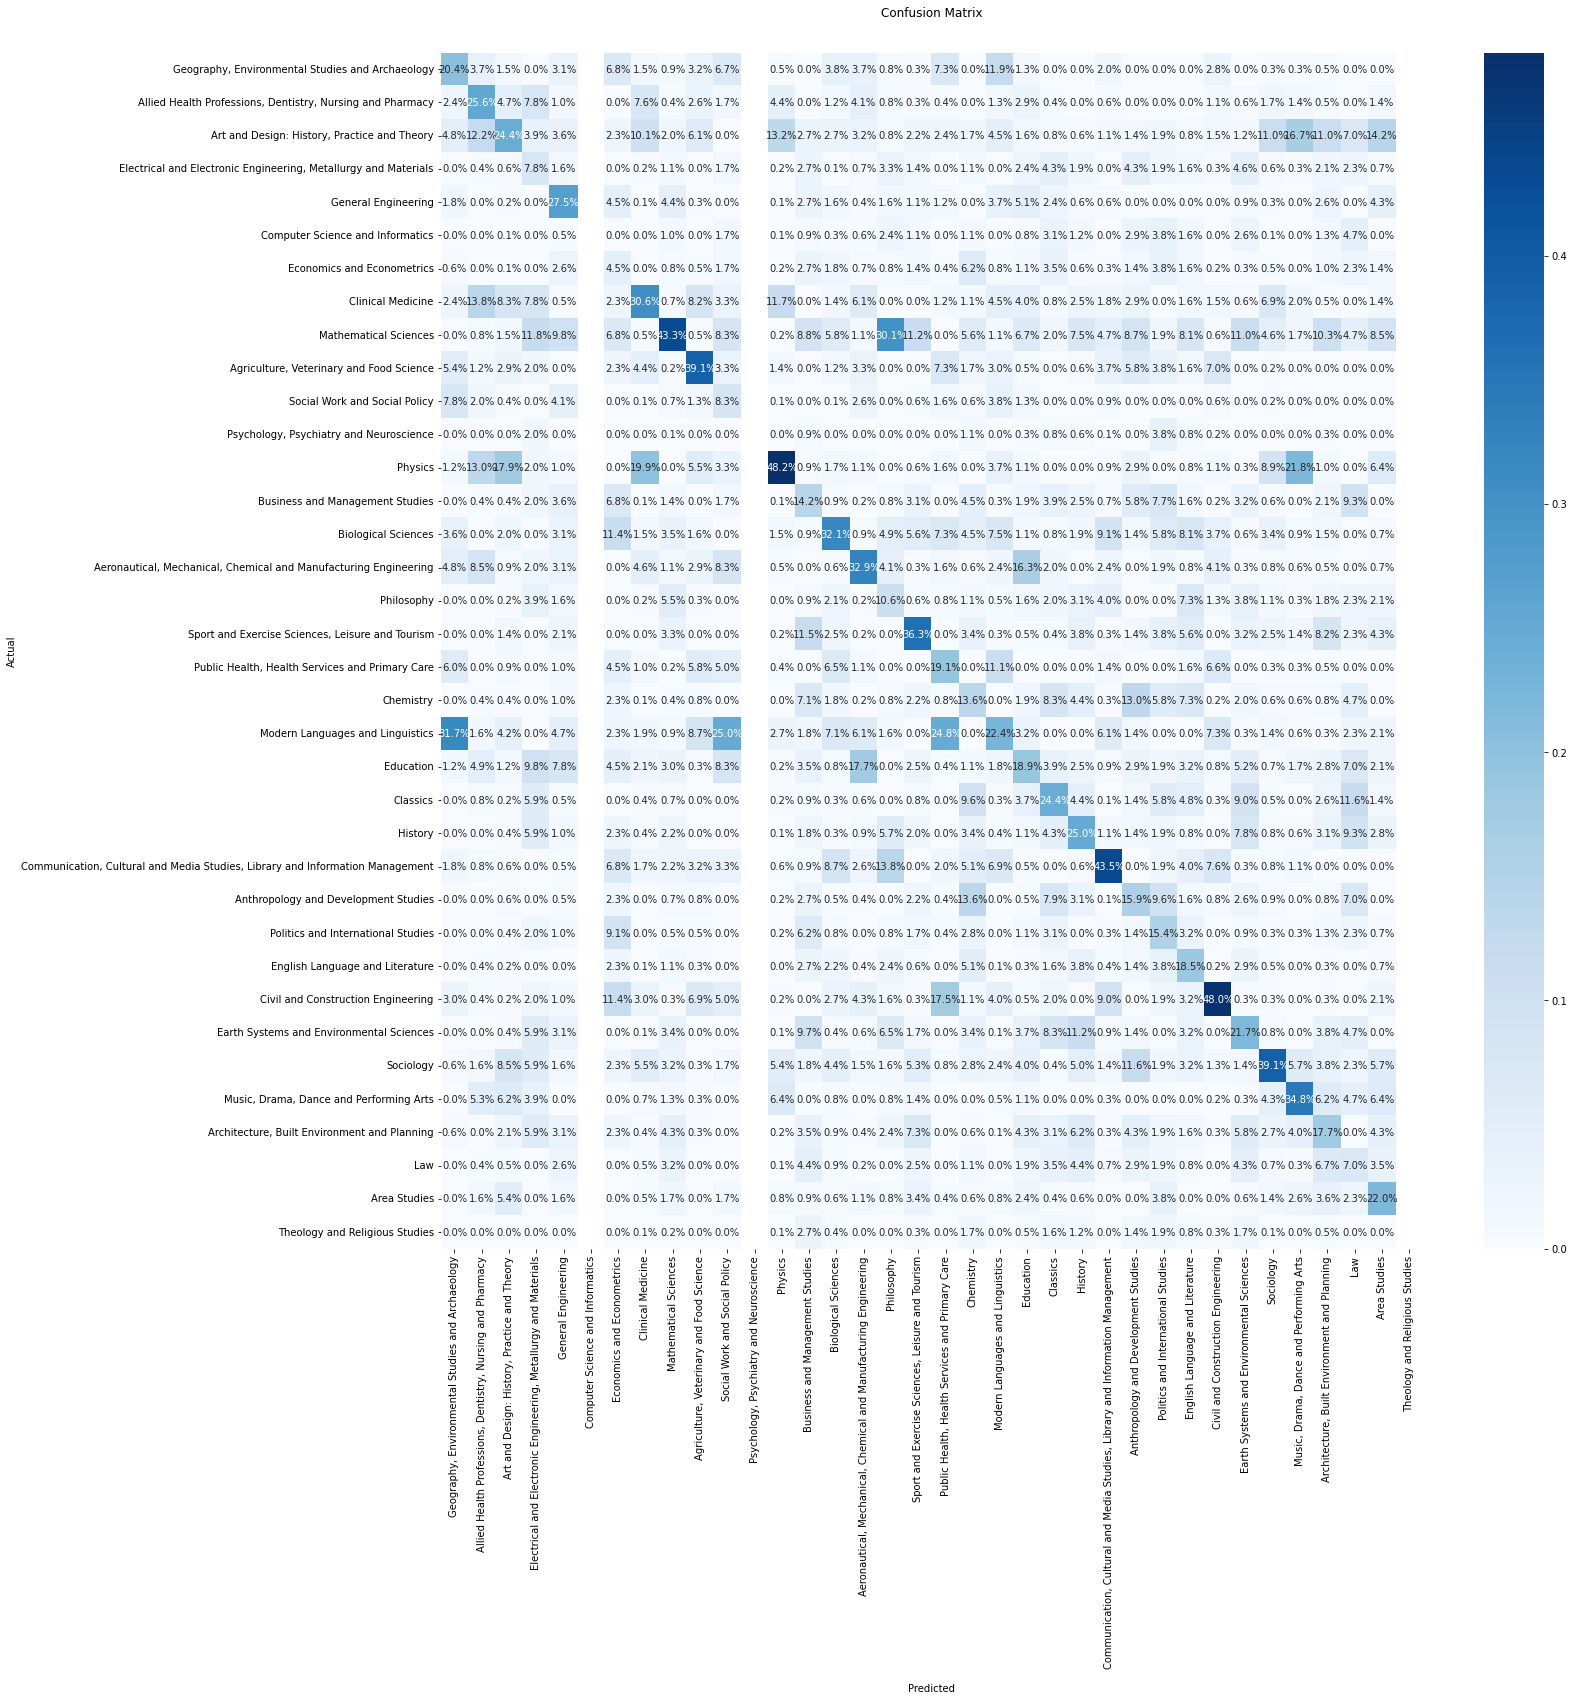

time: 7.74 s (started: 2022-07-19 14:37:36 +00:00)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,22))
ax = sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.1%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(id_to_category.values())
ax.yaxis.set_ticklabels(id_to_category.values())

## Display the visualization of the Confusion Matrix.
plt.show()